Text(0.05, 0.8, 'Goodness of fit = 2.73E+04')

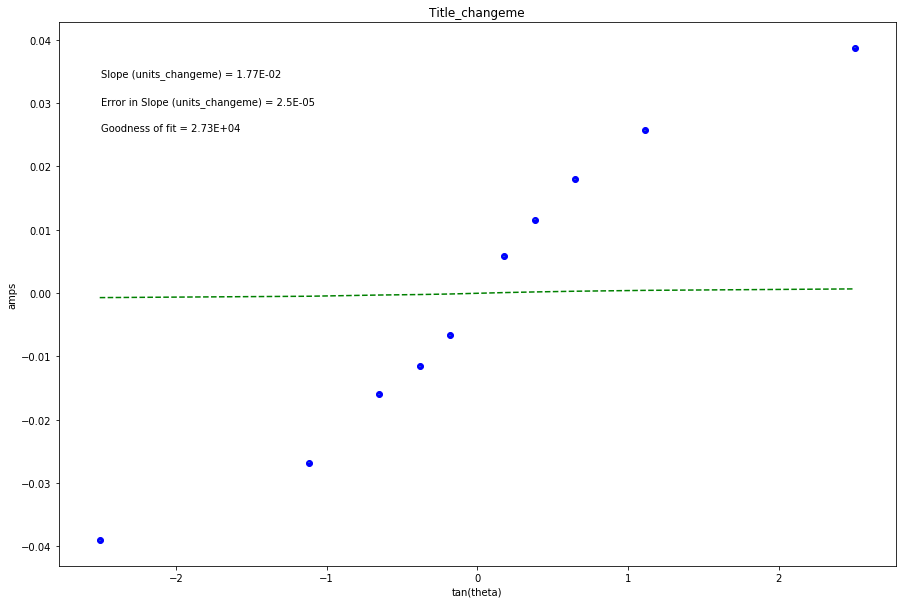

In [11]:

import numpy as np
import matplotlib.pyplot as plt

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

def LLSFD2(x,y,dy,b,m):
    N = sum(((y-b-m*x)/dy)**2)
    return N
mu = 4*np.pi*10**-7
r = .109 # in meters
def BEhor(m, mu, N, r):
    BEhor = (m*mu*N)/(2*r)
    return BEhor
def rule4(Q, A, B, Aun, Bun, Ae, Be):
    Qun = np.abs(Q)*np.sqrt(((Ae*Aun/A)**2)+((Be*Bun/B)**2))
    return Qun

I100 = np.array([-.0391, -.0268, -.016, -.0116, -.0067, .0058, .0116, .0180, .0257, .0388]) # in amps
I200 = np.array([-.01997, -.01427, .00974, -.00597, -.00330, .00216, .00596, .00871, .01288, .01956]) # in amps
I300 = np.array([-.01368, -.00974, -.00678, -.00445, -.00240, .0014, .00371, .00573, .00856, .01255]) # in amps
tan_theta = np.tan(np.array([-1.191, -.83909, -.57735, -.36397, -.176326, .176326, .36397, .57735, .83909, 1.191])) # in radians

I_un = np.array([.0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001])

x1 = tan_theta
y1 = I100
dy = I_un

b1, m1 = np.polynomial.polynomial.polyfit(x1, y1, 1, w=dy)
fit1 = b1+m1*I100
D1=Delta(I100, I_un)
dm1 = np.sqrt(1/D1*sum(1/I_un**2))
N100 = LLSFD2(I100, tan_theta, I_un, b1, m1)

D = Delta(x1, dy)

dm = np.sqrt(1 / D * sum(1 / dy ** 2))  # error in slope
db = np.sqrt(1 / D * sum(x1 ** 2 / dy ** 2))  # error in intercept

N = LLSFD2(x1, y1, dy, b1, m1)

plt.figure(figsize=(15, 10))

plt.plot(x1, fit1, color='green', linestyle='--')
plt.scatter(x1, y1, color='blue', marker='o')

plt.xlabel('tan(theta)');
plt.ylabel('amps');
plt.title('Title_changeme');

plt.errorbar(x1, y1, yerr=dy, xerr=None, fmt="none")

plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m1, digits=2),
             (0.05, 0.9), xycoords='axes fraction')

plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')

plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')